## 讀取資料

In [1]:
import pandas
customers = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/ctbcpy/master/data/customer_data.tsv', sep= '\t')

## 檢視資料

In [2]:
customers.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(2)
memory usage: 1015.7+ KB


In [5]:
customers.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## 資料篩選

In [7]:
customers.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
customers = customers.iloc[:,3:]

In [10]:
customers.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
CreditScore        10000 non-null int64
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(1)
memory usage: 781.3+ KB


In [16]:
customers.select_dtypes('object').head()

,Gender
0,Female
1,Female
2,Female
3,Female
4,Female


In [18]:
customers['Gender'].unique()

array(['Female', 'Male'], dtype=object)

## 資料編碼

### Method 1: 建立Dummy Variable

In [23]:
gender = pandas.get_dummies(customers['Gender'])
del gender['Female']
gender.head()
tmp = pandas.concat([customers, gender], axis = 1)
del tmp['Gender']
tmp.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0


### Method 2: 使用Map

In [27]:
customers['Gender'].map(lambda e : 1 if e == 'Male' else 0).head()

0    0
1    0
2    0
3    0
4    0
Name: Gender, dtype: int64

### Method 3: 使用Replace

In [29]:
customers['Gender'].replace({'Male':1 , 'Female': 0}).head()

0    0
1    0
2    0
3    0
4    0
Name: Gender, dtype: int64

### Method 4: 使用LabelEncoder

In [30]:
from sklearn.preprocessing import LabelEncoder
sc = LabelEncoder()
sc.fit_transform(customers['Gender'])

array([0, 0, 0, ..., 0, 1, 0])

In [31]:
from sklearn.preprocessing import LabelEncoder
sc = LabelEncoder()
customers['Gender'] = sc.fit_transform(customers['Gender'])

In [33]:
customers.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0


In [34]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
CreditScore        10000 non-null int64
Gender             10000 non-null int32
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int32(1), int64(7)
memory usage: 742.3 KB


## 將資料切分成訓練與測試資料集

In [35]:
X = customers.iloc[:,:-1]
Y = customers.iloc[:,-1]

In [36]:
X.shape

(10000, 9)

In [37]:
Y.shape

(10000,)

In [40]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [41]:
train_X.shape

(8000, 9)

In [42]:
test_X.shape

(2000, 9)

## 建立模型

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(train_X, train_Y)

clf2 = LogisticRegression()
clf2.fit(train_X, train_Y)

clf3 = SVC(probability=True)
clf3.fit(train_X, train_Y)

clf4 = RandomForestClassifier()
clf4.fit(train_X, train_Y)

clf5 = GradientBoostingClassifier()
clf5.fit(train_X, train_Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

## 繪製ROC Curve

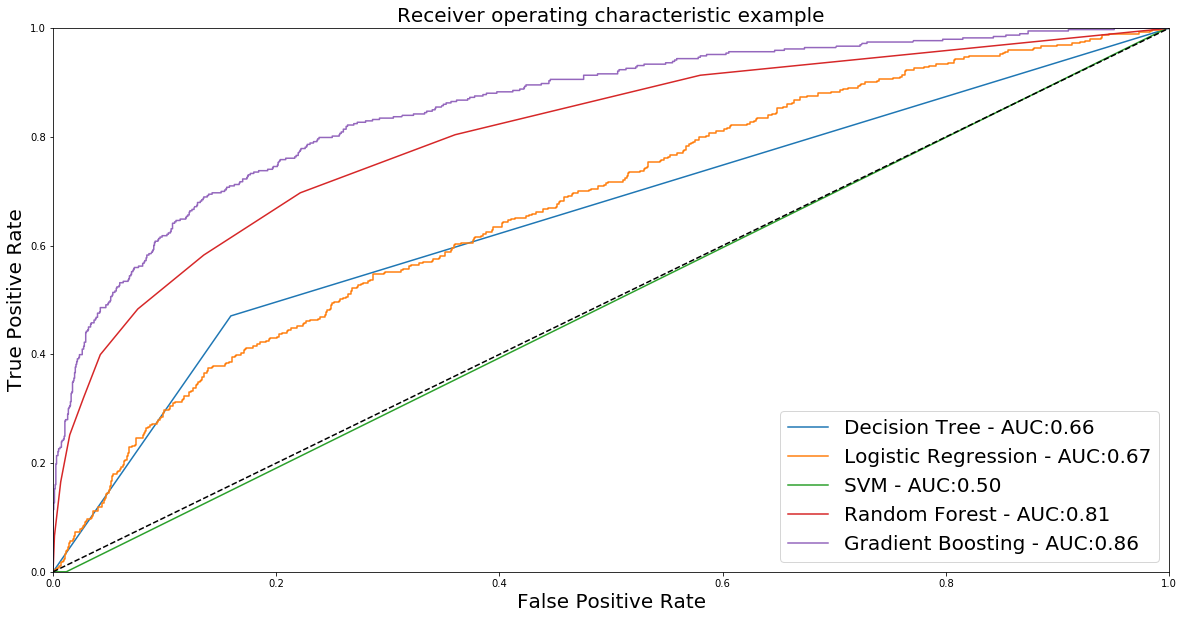

In [47]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from matplotlib import pyplot as plt
models = [clf1, clf2, clf3, clf4, clf5]
labels = ['Decision Tree', 'Logistic Regression', 'SVM', 'Random Forest', 'Gradient Boosting']


plt.figure(figsize= [20,10])
for title, clf in zip(labels, models):
    probas_ = clf.predict_proba(test_X)
    fpr, tpr, thresholds = roc_curve(test_Y, probas_[:, 1])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()

## 超參數調整 (HyperParameter Tuning)

In [48]:
train_X.shape

(8000, 9)

In [50]:
param_dist = {
    'n_estimators' :[50,100,150, 200],
    'max_depth' :[3,5,7]
}

In [52]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
rand = RandomizedSearchCV(clf5, param_dist, cv=10, scoring='accuracy', random_state=10)
rand.fit(train_X,train_Y)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': [50, 100, 150, 200], 'max_depth': [3, 5, 7]},
          pre_dispatch='2*n_jobs', random_state=10, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [53]:
rand.best_params_

{'n_estimators': 50, 'max_depth': 3}

In [55]:
rand.best_score_

0.857125

## 利用最佳參數建立模型

In [56]:
from sklearn.metrics import accuracy_score
clf = GradientBoostingClassifier(n_estimators=50, max_depth=3 )
clf.fit(train_X,train_Y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [58]:
predicted = clf.predict(test_X)

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_Y, predicted)

0.8615

In [60]:
confusion_matrix(test_Y, predicted)

array([[1560,   47],
       [ 230,  163]], dtype=int64)

In [62]:
from sklearn.metrics import classification_report
print(classification_report(test_Y, predicted))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.78      0.41      0.54       393

   micro avg       0.86      0.86      0.86      2000
   macro avg       0.82      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



In [63]:
probas_ = clf.predict_proba(test_X)
fpr, tpr, thresholds = roc_curve(test_Y, probas_[:, 1])
auc_score = auc(fpr, tpr)
auc_score

0.8565674031075876

## 階層式分群方法

In [64]:
from sklearn.datasets import load_iris
iris = load_iris()

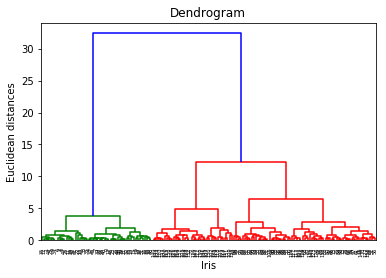

In [65]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

dendrogram = sch.dendrogram(sch.linkage(iris.data, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Iris')
plt.ylabel('Euclidean distances')
plt.show()


In [66]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(
    n_clusters = 3, 
    affinity = 'euclidean',
    linkage = 'ward')

y_hc = hc.fit_predict(iris.data)


In [67]:
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

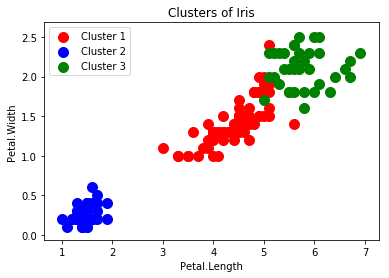

In [68]:
plt.scatter(iris.data[y_hc == 0, 2], iris.data[y_hc == 0, 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(iris.data[y_hc == 1, 2], iris.data[y_hc == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(iris.data[y_hc == 2, 2], iris.data[y_hc == 2, 3], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of Iris')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Original')

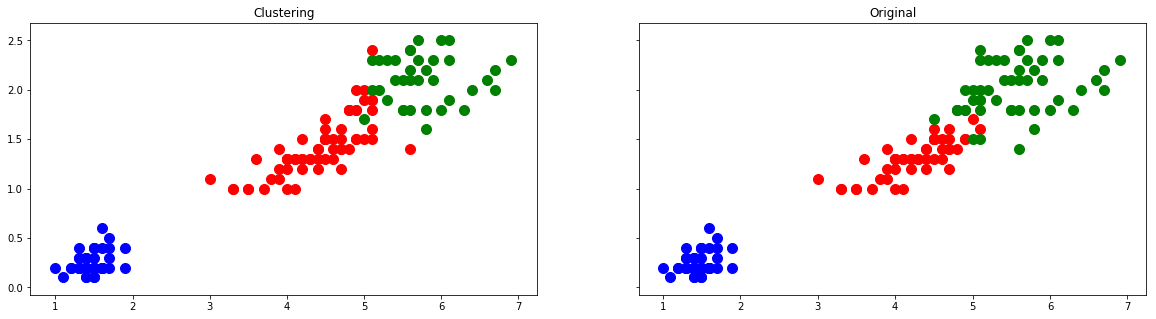

In [72]:
f, axarr = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(20, 5))


axarr[0].scatter(iris.data[y_hc == 0, 2], iris.data[y_hc == 0, 3], s = 100, c = 'red', label = 'Cluster 1')
axarr[0].scatter(iris.data[y_hc == 1, 2], iris.data[y_hc == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
axarr[0].scatter(iris.data[y_hc == 2, 2], iris.data[y_hc == 2, 3], s = 100, c = 'green', label = 'Cluster 3')
axarr[0].set_title('Clustering')

axarr[1].scatter(iris.data[iris.target == 0, 2], iris.data[iris.target == 0, 3], s = 100, c = 'blue', label = 'Cluster 1')
axarr[1].scatter(iris.data[iris.target == 1, 2], iris.data[iris.target == 1, 3], s = 100, c = 'red', label = 'Cluster 2')
axarr[1].scatter(iris.data[iris.target == 2, 2], iris.data[iris.target == 2, 3], s = 100, c = 'green', label = 'Cluster 3')
axarr[1].set_title('Original')

## KMeans 分群

In [73]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state= 123)
y_kmeans = kmeans.fit_predict(iris.data)
y_kmeans


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

Text(0.5, 1.0, 'Original')

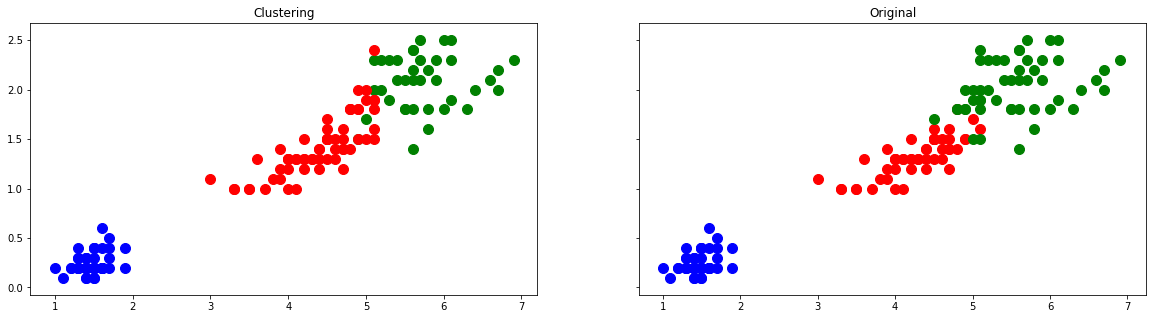

In [76]:
f, axarr = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(20, 5))


axarr[0].scatter(iris.data[y_kmeans == 0, 2], iris.data[y_kmeans == 0, 3], s = 100, c = 'green', label = 'Cluster 1')
axarr[0].scatter(iris.data[y_kmeans == 1, 2], iris.data[y_kmeans == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
axarr[0].scatter(iris.data[y_kmeans == 2, 2], iris.data[y_kmeans == 2, 3], s = 100, c = 'red', label = 'Cluster 3')
axarr[0].set_title('Clustering')

axarr[1].scatter(iris.data[iris.target == 0, 2], iris.data[iris.target == 0, 3], s = 100, c = 'blue', label = 'Cluster 1')
axarr[1].scatter(iris.data[iris.target == 1, 2], iris.data[iris.target == 1, 3], s = 100, c = 'red', label = 'Cluster 2')
axarr[1].scatter(iris.data[iris.target == 2, 2], iris.data[iris.target == 2, 3], s = 100, c = 'green', label = 'Cluster 3')
axarr[1].set_title('Original')

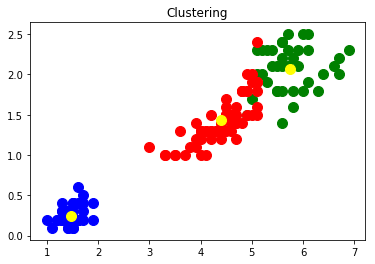

In [81]:
plt.scatter(iris.data[y_kmeans == 0, 2], iris.data[y_kmeans == 0, 3], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(iris.data[y_kmeans == 1, 2], iris.data[y_kmeans == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(iris.data[y_kmeans == 2, 2], iris.data[y_kmeans == 2, 3], s = 100, c = 'red', label = 'Cluster 3')
plt.title('Clustering')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3],
            s = 100, c = 'yellow', label = 'Centroids')

## 客戶資料分群

In [83]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/customers.csv')
X = df.iloc[:,[3,4]]

In [87]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state= 123)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

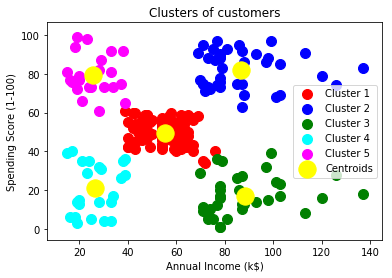

In [98]:
plt.scatter(X[y_kmeans == 0].iloc[:,0],X[y_kmeans == 0].iloc[:,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1].iloc[:,0],X[y_kmeans == 1].iloc[:,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2].iloc[:,0],X[y_kmeans == 2].iloc[:,1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3].iloc[:,0],X[y_kmeans == 3].iloc[:,1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4].iloc[:,0],X[y_kmeans == 4].iloc[:,1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow',
label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [100]:
df['Genre'] = df['Genre'].replace({'Male': 1, 'Female': 0})

In [102]:
X2 = df.iloc[:,1:]

In [103]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state= 123)
y_kmeans2 = kmeans.fit_predict(X2)
y_kmeans2

array([6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0,
       6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 3, 0, 6, 4,
       6, 0, 3, 4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 4,
       3, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 4, 4, 3, 3, 4, 3, 3, 4, 3, 3, 4,
       4, 3, 3, 4, 3, 4, 4, 4, 3, 4, 3, 4, 4, 3, 3, 4, 3, 4, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 3, 3, 3, 3, 4, 4, 4, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       4, 5, 1, 5, 1, 5, 1, 5, 1, 5, 4, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5, 1, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2,
       7, 2])